In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import os
from glob import glob

# =====================================================
# CONFIG
# =====================================================
BASE_DIR = "/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/SILO_EA_Monthly"   # Parent folder containing variable folders
OUTPUT_DIR = "/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate"
os.makedirs(OUTPUT_DIR, exist_ok=True)

YEARS = range(1991, 2024)

# =====================================================
# MAIN LOGIC
# =====================================================
for year in YEARS:
    print(f"🔄 Processing {year}")
    datasets = []

    # Find all NetCDF files for this year across subfolders
    nc_files = glob(
        os.path.join(BASE_DIR, "**", f"{year}.*_ea_monthly.nc"),
        recursive=True
    )

    if not nc_files:
        raise FileNotFoundError(f"No files found for {year}")

    for nc_file in nc_files:
        # -------------------------------------------------
        # Extract variable name from filename
        # Example: 1991.et_short_crop_ea_monthly.nc
        # -------------------------------------------------
        filename = os.path.basename(nc_file)
        var_name = filename.split(".")[1].replace("_ea_monthly", "")

        ds = xr.open_dataset(nc_file)

        # Keep ONLY the expected variable
        ds = ds[[var_name]]
        datasets.append(ds)

    # -------------------------------------------------
    # Merge all variables
    # -------------------------------------------------
    combined_ds = xr.merge(datasets)

    # -------------------------------------------------
    # Metadata
    # -------------------------------------------------
    combined_ds.attrs.update({
        "title": "Combined Climate Dataset",
        "year": year,
        "source": "SILO Climate Data",
        "created_by": "xarray automated merge"
    })

    # -------------------------------------------------
    # Save NetCDF
    # -------------------------------------------------
    out_file = os.path.join(OUTPUT_DIR, f"climate_{year}.nc")
    combined_ds.to_netcdf(out_file)

    print(f"✅ Saved {out_file}")

print("🎉 All climate variables combined successfully!")


🔄 Processing 1991
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate/climate_1991.nc
🔄 Processing 1992
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate/climate_1992.nc
🔄 Processing 1993
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate/climate_1993.nc
🔄 Processing 1994
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate/climate_1994.nc
🔄 Processing 1995
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate/climate_1995.nc
🔄 Processing 1996
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate/climate_1996.nc
🔄 Processing 1997
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate/climate_1997.nc
🔄 Processing 

In [ ]:
ds = xr.open_dataset("/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_climate/climate_1991.nc")
print(ds)

<xarray.Dataset> Size: 29MB
Dimensions:        (time: 12, lat: 160, lon: 213)
Coordinates:
  * time           (time) datetime64[ns] 96B 1991-01-01 ... 1991-12-01
  * lat            (lat) float64 1kB -35.1 -35.05 -35.0 ... -27.25 -27.2 -27.15
  * lon            (lon) float64 2kB 113.6 113.7 113.7 ... 124.1 124.2 124.2
Data variables:
    max_temp       (time, lat, lon) float64 3MB ...
    et_short_crop  (time, lat, lon) float64 3MB ...
    min_temp       (time, lat, lon) float64 3MB ...
    rh_tmax        (time, lat, lon) float64 3MB ...
    rh_tmin        (time, lat, lon) float64 3MB ...
    monthly_rain   (time, lat, lon) float64 3MB ...
    radiation      (time, lat, lon) float64 3MB ...
    vp             (time, lat, lon) float64 3MB ...
    vp_deficit     (time, lat, lon) float64 3MB ...
Attributes: (12/14)
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Departmen

Drought Combine

In [9]:
import xarray as xr
import os
from glob import glob

# =====================================================
# CONFIG
# =====================================================
BASE_DIR = "/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/drought_indices"
OUTPUT_DIR = "/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices"
os.makedirs(OUTPUT_DIR, exist_ok=True)

YEARS = range(1991, 2024)

# =====================================================
# MAIN LOGIC
# =====================================================
for year in YEARS:
    print(f"🔄 Processing {year}")
    datasets = []

    # -------------------------------------------------
    # Find SPI / SPEI files for the year
    # -------------------------------------------------
    nc_files = glob(
        os.path.join(BASE_DIR, "**", f"*_{year}.nc"),
        recursive=True
    )

    if not nc_files:
        raise FileNotFoundError(f"No SPI/SPEI files found for {year}")

    for nc_file in nc_files:
        ds = xr.open_dataset(nc_file)

        # -------------------------------------------------
        # Keep ALL variables in the file
        # Example:
        # SPI → spi_1, spi_3, spi_6, spi_12
        # SPEI → spei_1, spei_3, spei_6, spei_12
        # -------------------------------------------------
        datasets.append(ds)

    # -------------------------------------------------
    # Merge SPI + SPEI (all timescales)
    # -------------------------------------------------
    combined_ds = xr.merge(datasets, compat="no_conflicts")

    # -------------------------------------------------
    # Metadata
    # -------------------------------------------------
    combined_ds.attrs.update({
        "title": "Combined SPI and SPEI Dataset (All Timescales)",
        "year": year,
        "variables": "spi_1, spi_3, spi_6, spi_12, spei_1, spei_3, spei_6, spei_12",
        "source": "Processed SPI/SPEI Data",
        "created_by": "xarray automated merge"
    })

    # -------------------------------------------------
    # Save NetCDF
    # -------------------------------------------------
    out_file = os.path.join(OUTPUT_DIR, f"spi_spei_{year}.nc")
    combined_ds.to_netcdf(out_file)

    print(f"✅ Saved {out_file}")

print("🎉 All SPI & SPEI timescales combined successfully!")


🔄 Processing 1991
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices/spi_spei_1991.nc
🔄 Processing 1992
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices/spi_spei_1992.nc
🔄 Processing 1993
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices/spi_spei_1993.nc
🔄 Processing 1994
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices/spi_spei_1994.nc
🔄 Processing 1995
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices/spi_spei_1995.nc
🔄 Processing 1996
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices/spi_spei_1996.nc
🔄 Processing 1997
✅ Saved /content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data

In [10]:
ds = xr.open_dataset("/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices/spi_spei_1991.nc")
print(ds)

<xarray.Dataset> Size: 20MB
Dimensions:  (time: 12, lat: 160, lon: 213)
Coordinates:
  * time     (time) datetime64[ns] 96B 1991-01-01 1991-02-01 ... 1991-12-01
  * lat      (lat) float64 1kB -35.1 -35.05 -35.0 -34.95 ... -27.25 -27.2 -27.15
  * lon      (lon) float64 2kB 113.6 113.7 113.7 113.8 ... 124.1 124.2 124.2
Data variables:
    spei_1   (time, lat, lon) float32 2MB ...
    spei_3   (time, lat, lon) float32 2MB ...
    spei_6   (time, lat, lon) float32 2MB ...
    spei_12  (time, lat, lon) float32 2MB ...
    spi_1    (time, lat, lon) float64 3MB ...
    spi_3    (time, lat, lon) float64 3MB ...
    spi_6    (time, lat, lon) float64 3MB ...
    spi_12   (time, lat, lon) float64 3MB ...
Attributes:
    title:       Combined SPI and SPEI Dataset (All Timescales)
    year:        1991
    variables:   spi_1, spi_3, spi_6, spi_12, spei_1, spei_3, spei_6, spei_12
    source:      Processed SPI/SPEI Data
    created_by:  xarray automated merge


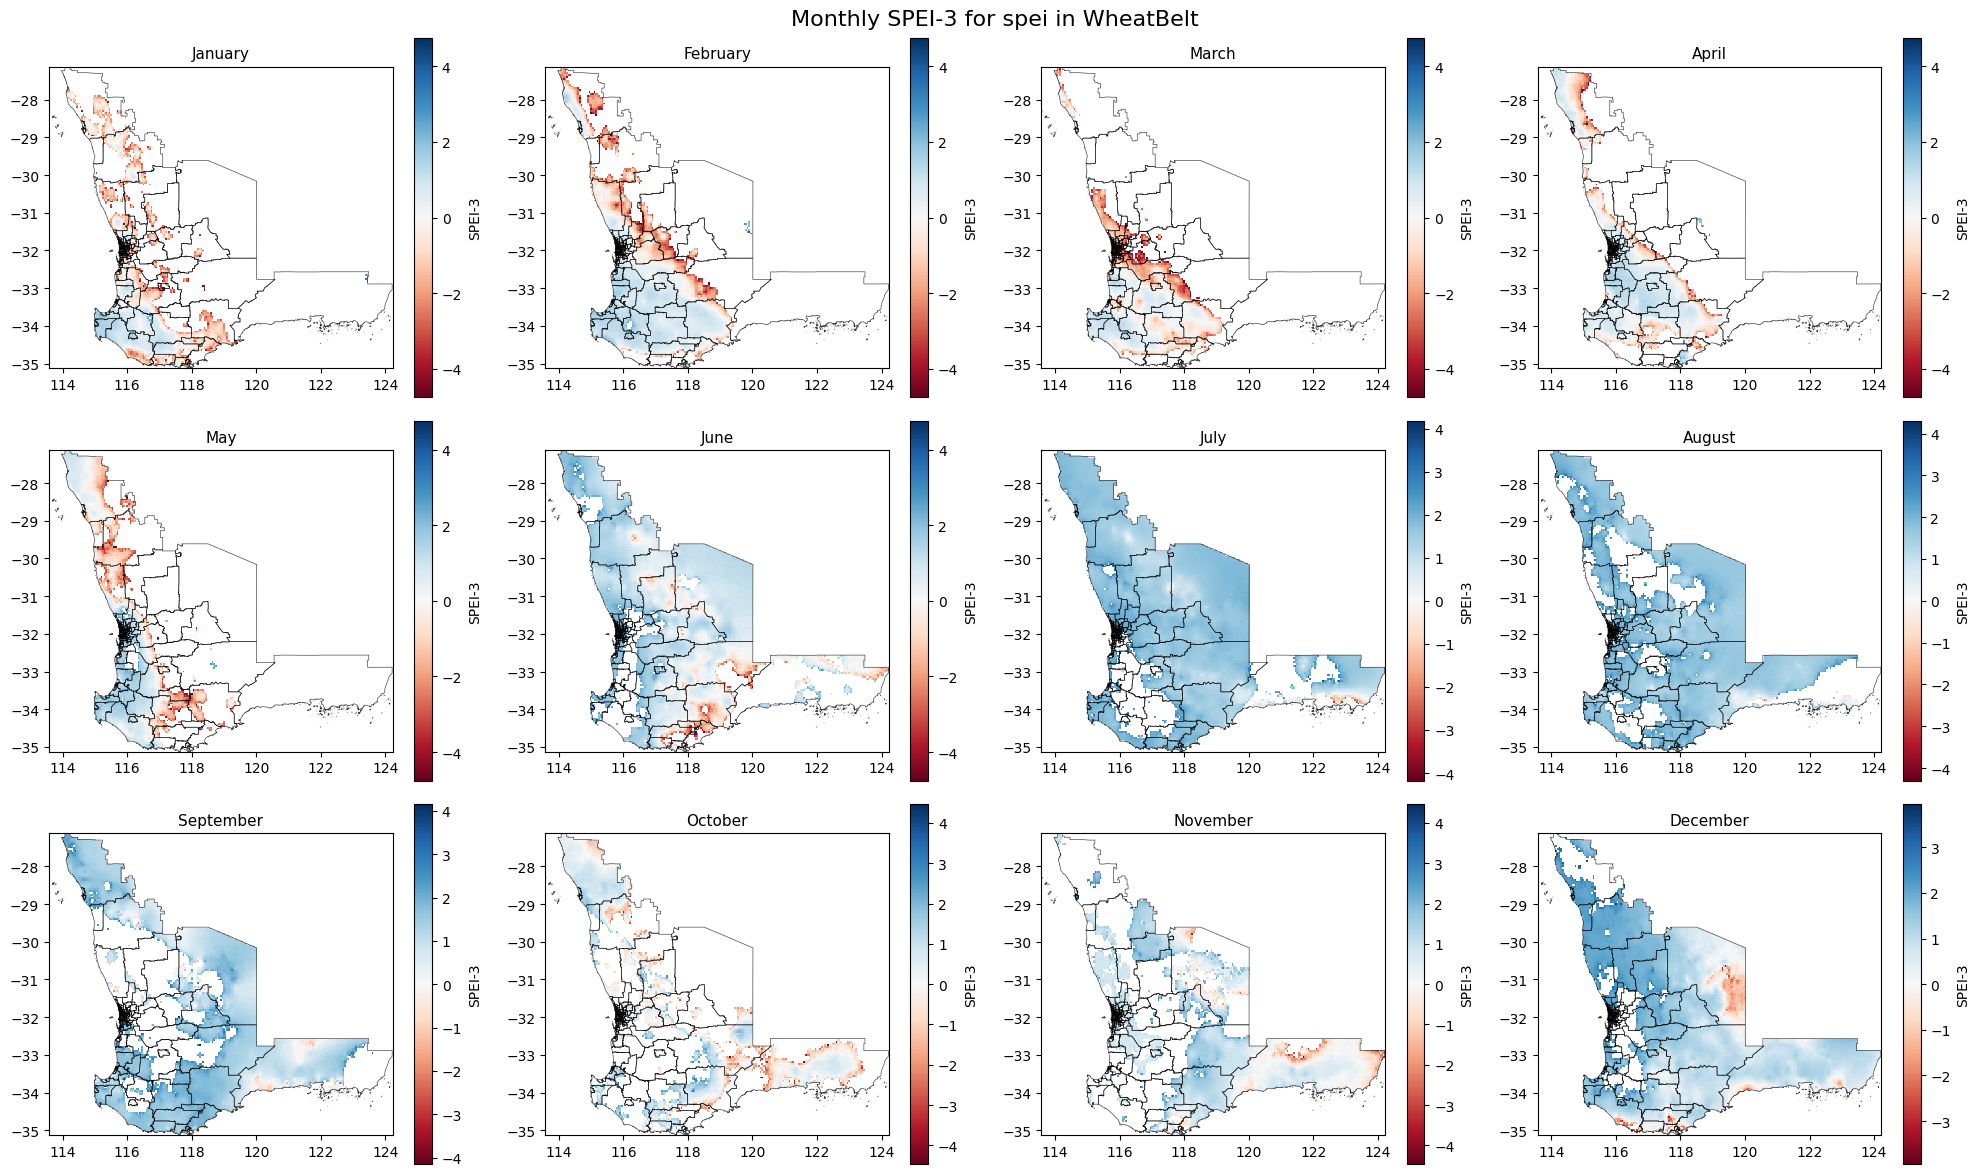

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path

# === Load the shapefile ===
shapefile_path = r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Eastern_Aus_Bunbury/Eastern_Aus_Bunbury.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the SPI dataset ===
nc_path = Path(r'/content/drive/MyDrive/Research Works - Development/Work 2 - SPI SPEI/Data/raster/combined_drought_indices/spi_spei_1991.nc')
year = nc_path.stem.split('_')[1]

ds = xr.open_dataset(nc_path)

# === Select SPI variable ONCE ===
var_name = 'spei_3'          # change here: spi_3, spi_6, etc.
monthly_rain = ds[var_name]

# === Convert variable name to display label ===
spi_label = var_name.replace('_', '-').upper()   # spi_1 → SPI-1

# === Fix metadata so colorbar label is correct ===
monthly_rain.attrs.pop('units', None)
monthly_rain.attrs['long_name'] = spi_label

# === Create figure and axes ===
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# === Plot each month ===
for i, month in enumerate(monthly_rain.time):
    ax = axes[i]
    data = monthly_rain.sel(time=month)

    data.plot(
        ax=ax,
        cmap='RdBu',
        add_colorbar=True
    )

    # Overlay region boundaries
    qld_shape.boundary.plot(
        ax=ax,
        color='black',
        linewidth=0.5,
        alpha=0.7
    )

    # Titles and formatting
    ax.set_title(month.dt.strftime('%B').item(), fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused subplots ===
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === Figure title (automatic) ===
plt.suptitle(
    f'Monthly {spi_label} for {year} in WheatBelt',
    fontsize=16,
    y=0.98
)

plt.tight_layout()
plt.show()
